# Video: Normalizing Palmer Penguins Principal Components Analysis

This video illustrates the impact of relative column scales and normalizing them using the Palmer Penguins data set.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

pd.options.mode.copy_on_write = True

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])

In [ ]:
penguins_pca_columns = [c for c in penguins.columns if penguins[c].dtype == 'float64']

In [ ]:
color_map = {"Adelie Penguin (Pygoscelis adeliae)": "blue",
             "Gentoo penguin (Pygoscelis papua)": "orange",
             "Chinstrap penguin (Pygoscelis antarctica)": "green"}
color_map

{'Adelie Penguin (Pygoscelis adeliae)': 'blue',
 'Gentoo penguin (Pygoscelis papua)': 'orange',
 'Chinstrap penguin (Pygoscelis antarctica)': 'green'}

Slide: Previous Palmer Penguins Visualization with PCA


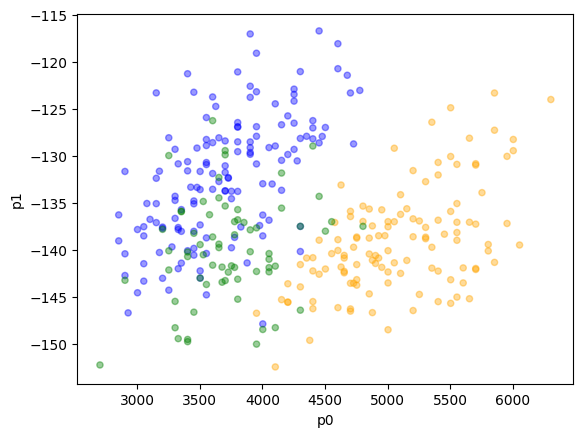

In [ ]:

penguins_pca = PCA()
penguins_pca.fit(penguins[penguins_pca_columns].dropna())
penguins_components = pd.DataFrame(penguins_pca.components_, columns=penguins_pca_columns)
penguins_projected = penguins[penguins_pca_columns] @ penguins_components.iloc[:2].T
penguins_projected.plot.scatter(0, 1, alpha=0.4, color=penguins["Species"].map(color_map))
plt.xlabel("p0")
plt.ylabel("p1")
None

In [ ]:
penguins_normalized = penguins[penguins_pca_columns] / penguins[penguins_pca_columns].std()
penguins_normalized.std()

Culmen Length (mm)     1.0
Culmen Depth (mm)      1.0
Flipper Length (mm)    1.0
Body Mass (g)          1.0
Delta 15 N (o/oo)      1.0
Delta 13 C (o/oo)      1.0
dtype: float64

In [ ]:
normalized_pca = PCA()
normalized_pca.fit(penguins_normalized.dropna())
normalized_components = pd.DataFrame(normalized_pca.components_, columns=penguins_pca_columns)
normalized_components

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.287072,-0.411945,0.497836,0.487413,-0.409172,-0.308315
1,0.660741,0.191187,0.219736,0.205327,0.371306,0.546405
2,-0.043059,0.771212,0.138965,0.339779,0.142632,-0.498269
3,-0.048686,0.391278,-0.152558,0.152380,-0.771516,0.450334
4,0.667546,0.114136,-0.227246,-0.525883,-0.264183,-0.378641
5,0.176549,-0.181260,-0.780801,0.552311,0.096626,-0.109279


In [ ]:
normalized_projected = penguins_normalized @ normalized_components.iloc[:2].T
normalized_projected

,0,1
Sample Number,,
1,NaN,NaN
2,10.294814,-0.627849
3,10.875116,-1.303733
4,NaN,NaN
5,10.166625,-1.319550
...,...,...
64,10.894356,2.574524
65,10.254719,0.556170
66,10.516286,1.111645


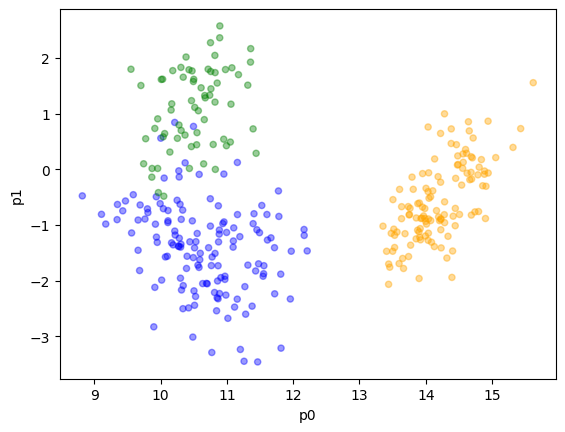

In [ ]:
normalized_projected.plot.scatter(0, 1, alpha=0.4, color=penguins["Species"].map(color_map))
plt.xlabel("p0")
plt.ylabel("p1")
None